<a href="https://colab.research.google.com/github/swamyshravan/data-science-projects/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load all packages**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

# **problem 1**

**Load Data**

In [2]:
data = pd.read_table('Diabetis.txt', sep='\t', header=0)
data.head(3)

,Unnamed: 0,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1


**Sepetare output and input Data**

In [3]:
X = data[['NPG', 'PGL', 'DIA', 'TSF', 'INS', 'BMI', 'DPF', 'AGE']]
y = data['Diabet']

In [4]:
sel = data.loc[:,'NPG':'AGE']
sel.head()

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**Divide training and testing data**

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
X_test.head()

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [6]:
print('shape of full data', data.shape)
print('shape of trianing data ', X_train.shape)

shape of full data (768, 10)
shape of trianing data  (614, 8)


**Creating Model**

In [7]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Confusion Matrix**

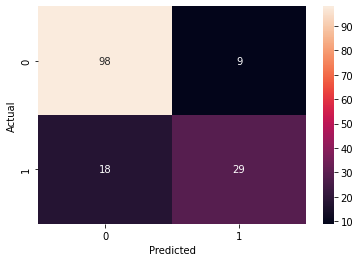

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

**Check accuracy of model using metrics.accuracy_score(actual, pred)**

In [9]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix)

Accuracy:  0.8246753246753247
Predicted   0   1
Actual           
0          98   9
1          18  29


**Use new data to predict outcome for created model**

In [10]:
new_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50], 
            [1, 120,	66,	29,	90,	26.6,	0.351,	50]]

In [11]:
new_pred = logistic_regression.predict(new_data)
new_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1, 0])

## **Problem 2**

In [15]:
data = pd.read_table('admission.txt', sep='\t', header=0)
data.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [16]:
X = data[['gre','gpa','rank']]
y = data['admit']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
X_train.head()

,gre,gpa,rank
336,520,3.15,3
64,580,4.00,3
55,740,4.00,3
106,700,3.56,1
300,640,3.30,2


In [18]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

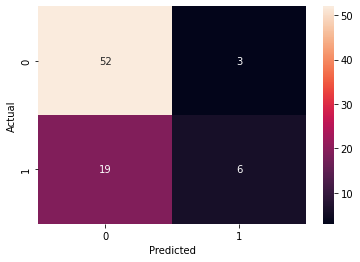

In [19]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [20]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.725


In [21]:
new_data = [[520,	3.15,	3], 
            [820,	4.95,	2]]

In [22]:
new_pred = logistic_regression.predict(new_data)
new_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0, 1])